<a href="https://colab.research.google.com/github/2SUBDA/Block2_Walk/blob/Week_5_New_Time/BDA_Rapids_colab_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Sanity Check #

Click the _Runtime_ dropdown at the top of the page, then _Change Runtime Type_ and confirm the instance type is _GPU_.

Check the output of `!nvidia-smi` to make sure you've been allocated a Tesla T4, P4, or P100.

In [1]:
!nvidia-smi

Thu Aug 12 22:16:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Setup:
Set up script installs
1. Updates gcc in Colab
1. Installs Conda
1. Install RAPIDS' current stable version of its libraries, as well as some external libraries including:
  1. cuDF
  1. cuML
  1. cuGraph
  1. cuSpatial
  1. cuSignal
  1. BlazingSQL
  1. xgboost
1. Copy RAPIDS .so files into current working directory, a neccessary workaround for RAPIDS+Colab integration.


In [2]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 282, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 282 (delta 61), reused 39 (delta 21), pack-reused 171
Receiving objects: 100% (282/282), 82.35 KiB | 6.86 MiB/s, done.
Resolving deltas: 100% (123/123), done.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla P100-PCIE-16GB!
***********************************************************************



In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [26.7 kB]
Get:11 http://security.ubu

In [1]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:27
🔁 Restarting kernel...


In [1]:
# you can now run the rest of the cells as normal
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [2]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
# The <packages> option are default blank or 'core'.  By default, we install RAPIDSAI and BlazingSQL.  The 'core' option will install only RAPIDSAI and not include BlazingSQL, 
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Installing RAPIDS Stable 21.08
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=11.0
    - gcsfs
    - llvmlite
    - openssl
    - python=3.7
    - rapids=21.08


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    abseil-cpp-20210324.2      |       h9c3ff4c_0        1010 KB  conda-forge
    aiohttp-3.7.4.post0        |   py37h5e8e339_0         625 KB  conda-forge
    anyio-3.3.0                |   py37h89c1867_0         146 KB  conda-forge
    appdirs-1.4.4              |     pyh9f0ad1d_0          13 KB  conda-fo

# RAPIDS is now installed on Colab.  You can copy your code into the cells below.  Enjoy!

In [3]:
import cudf
from cuml.tsa.arima import ARIMA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
pdf = pd.read_csv('https://raw.githubusercontent.com/2SUBDA/Block2_Walk/Week_5_New_Time/WMTStoreWeekly.csv')

In [ ]:
https://raw.githubusercontent.com/rapidsai/cuml/main/notebooks/data/time_series/population_estimate.csv

In [14]:
def load_dataset(pdf, max_batch=4):
    import os
    return cudf.from_pandas(pdf[pdf.columns[1:max_batch+1]].astype(np.float64))

In [5]:
def visualize(y, pred=None, pred_start=None, lower=None, upper=None):
    n_obs, batch_size = y.shape
    col = ["#1f77b4", "#ff7f0e"]

    # Create the subplots
    c = min(batch_size, 2)
    r = (batch_size + c - 1) // c
    fig, ax = plt.subplots(r, c, squeeze=False)
    ax = ax.flatten()
    
    # Range for the prediction
    if pred is not None:
        pred_start = pred_start or n_obs
        pred_end = pred_start + pred.shape[0]
    
    # Plot the data
    for i in range(batch_size):
        title = y.columns[i]
        ax[i].plot(np.r_[:n_obs], y[title].to_array(), color=col[0])
        if pred is not None:
            ax[i].plot(np.r_[pred_start:pred_end],
                       pred[pred.columns[i]].to_array(),
                       linestyle="--", color=col[1])
        # Prediction intervals
        if lower is not None and upper is not None:
            ax[i].fill_between(np.r_[pred_start:pred_end],
                               lower[lower.columns[i]].to_array(),
                               upper[upper.columns[i]].to_array(),
                               alpha=0.2, color=col[1])
        ax[i].title.set_text(title)
    for i in range(batch_size, r*c):
        fig.delaxes(ax[i])
    fig.tight_layout()
    plt.show()


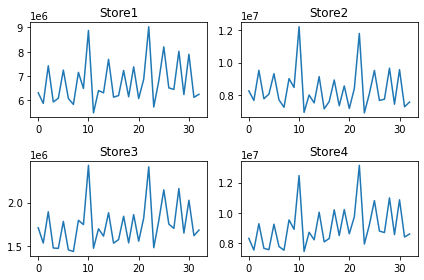

In [33]:
df_sales = load_dataset(pdf)
visualize(df_sales)


In [34]:
# Fit an ARIMA(2,1,3) model
# Based on analysis from https://github.com/2SUBDA/Block2_Walk/tree/Week_4 
# Week4_Asynch_TimeSeries_ARIMA.ipynb

model_sales = ARIMA(df_sales, (2,1,3), fit_intercept=True)
model_sales.fit()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Pass order=(2, 1, 3) as keyword args. From version 21.06, passing these as positional arguments will result in an error
  """


ARIMA()

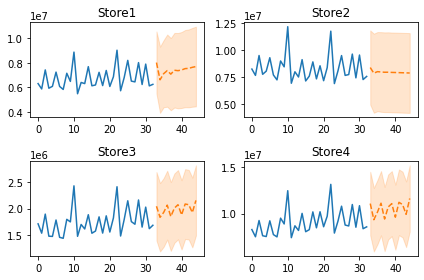

In [35]:
fc_sales, lower_sales, upper_sales = model_sales.forecast(12, level=0.95)
visualize(df_sales, fc_sales, lower=lower_sales, upper=upper_sales)

In [38]:
df_sales = load_dataset(pdf, 4)

# Create and fit an ARIMA(2,1,2)(1,1,1)12 model:
model_sales4 = ARIMA(df_sales, (2,1,1), (1,1,1,12), fit_intercept=False)
model_sales4.fit()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Pass order=(2, 1, 1), seasonal_order=(1, 1, 1, 12) as keyword args. From version 21.06, passing these as positional arguments will result in an error
  after removing the cwd from sys.path.


ARIMA()

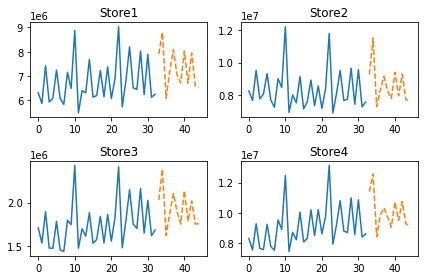

In [39]:

# Forecast
fc_sales4 = model_sales4.forecast(12)

# Visualize after the time step 34
visualize(df_sales, fc_sales4)

# Next Steps #

For an overview of how you can access and work with your own datasets in Colab, check out [this guide](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92).

For more RAPIDS examples, check out our RAPIDS notebooks repos:
1. https://github.com/rapidsai/notebooks
2. https://github.com/rapidsai/notebooks-contrib